In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1lrJK0GcdjWLwWIXXDmG4oN-8jMq-vVOhXvVQSO1ya44/edit?usp=sharing')

In [ ]:
import pandas as pd
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import applications 
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import models
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow import keras

**Load Data**

In [ ]:
sheet = wb.worksheet('Sheet1')
data = sheet.get_all_values()
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.iloc[1:]
print(df.shape)
df.head()

(220, 28)


,Left_Cadence,Right_Cadence,Left_Walking_Speed,Right_Walking_Speed,Left_Stride_Time,Right_Stride_Time,Left_Step_Time,Right_Step_Time,Left_Opposite_Foot_Off,Right_Opposite_Foot_Off,Left_Opposite_Foot_Contact,Right_Opposite_Foot_Contact,Left_Foot_Off,Right_Foot_Off,Left_Single_Support,Right_Single_Support,Left_Double_Support,Right_Double_Support,Left_Stride_Length,Right_Stride_Length,Left_Step_Length,Right_Step_Length,Left_Step_Width,Right_Step_Width,Left_Limp_Index,Right_Limp_Index,Gait Duration after data crop,Subjek
1,91.6,96.77,0.84,0.78,1.31,1.24,0.68,0.56,10.69,13.71,48.09,54.84,61.07,69.35,0.49,0.51,0.31,0.35,1.1,0.97,0.53,0.45,0.16,0.19,0.98,1.18,6.02,1
2,96,96,0.9,0.86,1.25,1.25,0.58,0.67,9.6,13.6,53.6,46.4,61.6,56,0.55,0.41,0.22,0.29,1.12,1.08,0.56,0.56,0.23,0.24,1.1,0.83,5.58,1
3,103.45,100.84,0.93,0.95,1.16,1.19,0.59,0.57,11.21,13.45,49.14,52.1,62.07,63.03,0.44,0.46,0.28,0.29,1.08,1.13,0.54,0.54,0.23,0.22,1,1.03,5.2,1
4,98.36,93.02,0.9,0.86,1.22,1.29,0.59,0.63,11.48,11.63,51.64,51.16,64.75,62.02,0.49,0.51,0.3,0.29,1.1,1.11,0.57,0.53,0.17,0.17,1.08,1.03,5.44,1
5,91.6,100,0.91,0.99,1.31,1.2,0.63,0.57,11.45,15.83,51.91,52.5,66.41,60.83,0.53,0.44,0.34,0.29,1.2,1.19,0.64,0.56,0.14,0.18,1.12,0.96,5.57,1


In [ ]:
#change data type from object to float
for col in df.columns:
  df[col] = df[col].astype(float)

df["Subjek"] = df["Subjek"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 1 to 220
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Left_Cadence                   220 non-null    float64
 1   Right_Cadence                  220 non-null    float64
 2   Left_Walking_Speed             220 non-null    float64
 3   Right_Walking_Speed            220 non-null    float64
 4   Left_Stride_Time               220 non-null    float64
 5   Right_Stride_Time              220 non-null    float64
 6   Left_Step_Time                 220 non-null    float64
 7   Right_Step_Time                220 non-null    float64
 8   Left_Opposite_Foot_Off         220 non-null    float64
 9   Right_Opposite_Foot_Off        220 non-null    float64
 10  Left_Opposite_Foot_Contact     220 non-null    float64
 11  Right_Opposite_Foot_Contact    220 non-null    float64
 12  Left_Foot_Off                  220 non-null    flo

**Splitting Data**

In [ ]:
#Splitting dataset

# # Splitting acak
# temp_train = []
# temp_val = []
# row, col = df.shape
# list_data = df.values.tolist()
# i = 0
# while(i<row):
#   x = randint(0, 4)
#   for j in range(5):
#     if(j!=x):
#       temp_train.append(list_data[i+j])
#   temp_val.append(list_data[i+x])
#   i += 5

# df_train = pd.DataFrame(temp_train)
# df_train.columns = df.columns
# df_val = pd.DataFrame(temp_val)
# df_val.columns = df.columns

# Splitting teratur
temp_train = []
temp_val = []
row, col = df.shape
list_data = df.values.tolist()
i = 0
#x = randint(0, 4)
x = 2
print(x)
while(i<row):
  for j in range(5):
    if(j!=x):
      temp_train.append(list_data[i+j])
  temp_val.append(list_data[i+x])
  i += 5


df_train = pd.DataFrame(temp_train)
df_train.columns = df.columns
df_train["Subjek"] = df_train["Subjek"].astype(int)
df_val = pd.DataFrame(temp_val)
df_val.columns = df.columns
df_val["Subjek"] = df_val["Subjek"].astype(int)
display(df_val)

2


,Left_Cadence,Right_Cadence,Left_Walking_Speed,Right_Walking_Speed,Left_Stride_Time,Right_Stride_Time,Left_Step_Time,Right_Step_Time,Left_Opposite_Foot_Off,Right_Opposite_Foot_Off,Left_Opposite_Foot_Contact,Right_Opposite_Foot_Contact,Left_Foot_Off,Right_Foot_Off,Left_Single_Support,Right_Single_Support,Left_Double_Support,Right_Double_Support,Left_Stride_Length,Right_Stride_Length,Left_Step_Length,Right_Step_Length,Left_Step_Width,Right_Step_Width,Left_Limp_Index,Right_Limp_Index,Gait Duration after data crop,Subjek
0,103.45,100.84,0.93,0.95,1.16,1.19,0.59,0.57,11.21,13.45,49.14,52.10,62.07,63.03,0.44,0.46,0.28,0.29,1.08,1.13,0.54,0.54,0.23,0.22,1.00,1.03,5.20,1
1,107.14,107.14,1.20,1.22,1.12,1.12,0.56,0.56,10.71,8.93,50.00,50.00,58.93,59.82,0.44,0.46,0.22,0.21,1.34,1.37,0.68,0.69,0.16,0.16,0.97,1.02,3.90,2
2,110.09,113.21,1.04,1.05,1.09,1.06,0.52,0.54,10.09,6.60,52.29,49.06,58.72,58.49,0.46,0.45,0.18,0.17,1.13,1.11,0.59,0.53,0.10,0.14,1.02,1.02,4.75,3
3,123.71,123.71,1.11,1.11,0.97,0.97,0.48,0.49,11.34,9.28,50.52,49.48,59.79,60.82,0.38,0.39,0.20,0.20,1.07,1.08,0.52,0.55,0.16,0.14,0.98,1.02,4.80,4
4,115.39,112.15,1.00,0.98,1.04,1.07,0.53,0.54,10.58,9.35,49.04,49.53,58.65,58.88,0.40,0.43,0.21,0.20,1.04,1.05,0.59,0.45,0.27,0.23,0.95,0.98,3.80,5
5,84.51,85.71,0.73,0.74,1.42,1.40,0.72,0.70,10.56,10.71,49.30,50.00,61.27,60.71,0.55,0.55,0.32,0.30,1.03,1.04,0.52,0.51,0.11,0.10,1.00,1.00,7.28,6
6,111.11,107.14,1.18,1.12,1.08,1.12,0.51,0.61,8.33,7.14,52.78,45.54,60.19,54.46,0.48,0.43,0.17,0.18,1.28,1.26,0.66,0.60,0.28,0.30,1.08,0.88,4.66,7
7,111.11,110.09,1.18,1.16,1.08,1.09,0.51,0.57,10.19,4.59,52.78,47.71,57.41,57.80,0.46,0.47,0.16,0.16,1.27,1.26,0.63,0.63,0.12,0.18,1.00,1.02,3.86,8
8,117.65,115.39,1.29,1.25,1.02,1.04,0.51,0.51,7.84,9.62,50.00,50.96,58.82,58.65,0.43,0.43,0.17,0.18,1.32,1.30,0.66,0.66,0.14,0.12,1.02,1.00,3.14,9
9,112.15,113.21,1.07,1.08,1.07,1.06,0.54,0.52,8.41,11.32,49.53,50.94,60.75,61.32,0.44,0.42,0.21,0.23,1.14,1.15,0.58,0.58,0.16,0.19,1.03,1.02,4.57,10


In [ ]:
df_train = df_train.sample(frac=1)
# df_train = df.sample(frac=1)
df_val = df_val.sample(frac=1)

x_train = df_train.loc[:, :'Gait Duration after data crop']
y_train = df_train.loc[:, 'Subjek']

x_val = df_val.loc[:, :'Gait Duration after data crop']
y_val = df_val.loc[:, 'Subjek']

y_val.head()

13    14
35    36
0      1
27    28
34    35
Name: Subjek, dtype: int64

**Standarization**

In [ ]:
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
sc.fit(x_val)
x_test_std = sc.transform(x_val)

# **Machine Learning**

**Perceptron**

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

ppn = Perceptron(max_iter=100, eta0=1, random_state=0)
ppn.fit(x_train_std, y_train)

y_pred = ppn.predict(x_test_std)
print('Training accuracy:', ppn.score(x_train_std, y_train))
print('Misclassified samples: %d' % (y_val != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_val, y_pred))
print('Precision: %.2f' % precision_score(y_val, y_pred, average='macro'))
print('Recall: %.2f' % recall_score(y_val, y_pred, average='macro'))
print('F1 score: %.2f' % f1_score(y_val, y_pred, average='macro'))

Training accuracy: 0.5852272727272727
Misclassified samples: 25
Accuracy: 0.43
Precision: 0.33
Recall: 0.43
F1 score: 0.36


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB(var_smoothing = 0.05)
bayes.fit(x_train_std, y_train)
y_pred = bayes.predict(x_test_std)
print('Training accuracy:', bayes.score(x_train_std, y_train))
print('Misclassified samples: %d' % (y_val != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_val, y_pred))
print('Precision: %.2f' % precision_score(y_val, y_pred, average='macro'))
print('Recall: %.2f' % recall_score(y_val, y_pred, average='macro'))
print('F1 score: %.2f' % f1_score(y_val, y_pred, average='macro'))

Training accuracy: 0.9545454545454546
Misclassified samples: 12
Accuracy: 0.73
Precision: 0.66
Recall: 0.73
F1 score: 0.68


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=10, random_state=0)
lr.fit(x_train_std, y_train)
y_pred = lr.predict(x_test_std)
print('Training accuracy:', lr.score(x_train_std, y_train))
print('Misclassified samples: %d' % (y_val != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_val, y_pred))
print('Precision: %.2f' % precision_score(y_val, y_pred, average='macro'))
print('Recall: %.2f' % recall_score(y_val, y_pred, average='macro'))
print('F1 score: %.2f' % f1_score(y_val, y_pred, average='macro'))

Training accuracy: 1.0
Misclassified samples: 11
Accuracy: 0.75
Precision: 0.68
Recall: 0.75
F1 score: 0.70


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**SVM**

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=0, gamma=0.1, C=1)
svm.fit(x_train_std, y_train)
y_pred = svm.predict(x_test_std)
print('Training accuracy:', svm.score(x_train_std, y_train))
print('Misclassified samples: %d' % (y_val != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_val, y_pred))
print('Precision: %.2f' % precision_score(y_val, y_pred, average='macro'))
print('Recall: %.2f' % recall_score(y_val, y_pred, average='macro'))
print('F1 score: %.2f' % f1_score(y_val, y_pred, average='macro'))

Training accuracy: 1.0
Misclassified samples: 10
Accuracy: 0.77
Precision: 0.72
Recall: 0.77
F1 score: 0.73


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, p=1, metric='minkowski', weights='distance')
knn.fit(x_train_std, y_train)
y_pred = knn.predict(x_test_std)
print('Training accuracy:', knn.score(x_train_std, y_train))
print('Misclassified samples: %d' % (y_val != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_val, y_pred))
print('Precision: %.2f' % precision_score(y_val, y_pred, average='macro'))
print('Recall: %.2f' % recall_score(y_val, y_pred, average='macro'))
print('F1 score: %.2f' % f1_score(y_val, y_pred, average='macro'))

Training accuracy: 1.0
Misclassified samples: 13
Accuracy: 0.70
Precision: 0.59
Recall: 0.70
F1 score: 0.63


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)
tree.fit(x_train_std, y_train)
y_pred = tree.predict(x_test_std)
print('Training accuracy:', tree.score(x_train_std, y_train))
print('Misclassified samples: %d' % (y_val != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_val, y_pred))
print('Precision: %.2f' % precision_score(y_val, y_pred, average='macro'))
print('Recall: %.2f' % recall_score(y_val, y_pred, average='macro'))
print('F1 score: %.2f' % f1_score(y_val, y_pred, average='macro'))

Training accuracy: 1.0
Misclassified samples: 22
Accuracy: 0.50
Precision: 0.43
Recall: 0.50
F1 score: 0.44


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=1000, 
                                max_depth = 20,
                                n_jobs=2)
forest.fit(x_train_std, y_train)
y_pred = forest.predict(x_test_std)
print('Training accuracy:', forest.score(x_train_std, y_train))
print('Misclassified samples: %d' % (y_val != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_val, y_pred))
print('Precision: %.2f' % precision_score(y_val, y_pred, average='macro'))
print('Recall: %.2f' % recall_score(y_val, y_pred, average='macro'))
print('F1 score: %.2f' % f1_score(y_val, y_pred, average='macro'))

Training accuracy: 1.0
Misclassified samples: 12
Accuracy: 0.73
Precision: 0.64
Recall: 0.73
F1 score: 0.67


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**MLPClassifier**

In [ ]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(learning_rate_init=0.001, activation= "logistic")
MLP.fit(x_train_std, y_train)
y_pred = MLP.predict(x_test_std)
print('Training accuracy:', MLP.score(x_train_std, y_train))
print('Accuracy: %.2f' % accuracy_score(y_val, y_pred))
print('Precision: %.2f' % precision_score(y_val, y_pred, average='macro'))
print('Recall: %.2f' % recall_score(y_val, y_pred, average='macro'))
print('F1 score: %.2f' % f1_score(y_val, y_pred, average='macro'))

Training accuracy: 0.8181818181818182
Accuracy: 0.75
Precision: 0.66
Recall: 0.75
F1 score: 0.69


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**SELEKSI FITUR**

In [ ]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, x, y):
        
        x_train, x_test, y_train, y_test = \
            train_test_split(x, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = x_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(x_train, y_train, 
                                 x_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(x_train, y_train, 
                                         x_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, x):
        return x[:, self.indices_]

    def _calc_score(self, x_train, y_train, x_test, y_test, indices):
        self.estimator.fit(x_train[:, indices], y_train)
        y_pred = self.estimator.predict(x_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

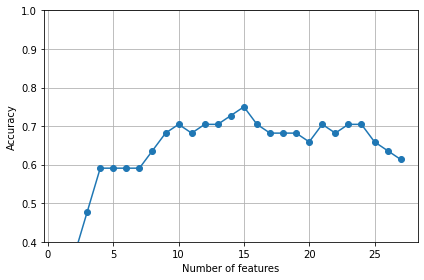

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, p=1, metric='minkowski', weights='distance')

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(x_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.4, 1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
k15 = list(sbs.subsets_[12])
print(df.columns[0:][k15])
df[df.columns[k15]]

Index(['Left_Cadence', 'Right_Cadence', 'Left_Walking_Speed',
       'Right_Walking_Speed', 'Left_Stride_Time', 'Left_Step_Time',
       'Left_Opposite_Foot_Contact', 'Right_Opposite_Foot_Contact',
       'Left_Foot_Off', 'Left_Single_Support', 'Left_Double_Support',
       'Left_Step_Length', 'Right_Step_Length', 'Left_Step_Width',
       'Right_Step_Width'],
      dtype='object', name=0)


,Left_Cadence,Right_Cadence,Left_Walking_Speed,Right_Walking_Speed,Left_Stride_Time,Left_Step_Time,Left_Opposite_Foot_Contact,Right_Opposite_Foot_Contact,Left_Foot_Off,Left_Single_Support,Left_Double_Support,Left_Step_Length,Right_Step_Length,Left_Step_Width,Right_Step_Width
1,91.60,96.77,0.84,0.78,1.31,0.68,48.09,54.84,61.07,0.49,0.31,0.53,0.45,0.16,0.19
2,96.00,96.00,0.90,0.86,1.25,0.58,53.60,46.40,61.60,0.55,0.22,0.56,0.56,0.23,0.24
3,103.45,100.84,0.93,0.95,1.16,0.59,49.14,52.10,62.07,0.44,0.28,0.54,0.54,0.23,0.22
4,98.36,93.02,0.90,0.86,1.22,0.59,51.64,51.16,64.75,0.49,0.30,0.57,0.53,0.17,0.17
5,91.60,100.00,0.91,0.99,1.31,0.63,51.91,52.50,66.41,0.53,0.34,0.64,0.56,0.14,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,106.20,107.14,1.08,1.09,1.13,0.57,49.56,50.00,58.41,0.47,0.19,0.64,0.58,0.16,0.14
217,107.14,107.14,1.08,1.08,1.12,0.57,49.11,50.89,58.93,0.46,0.20,0.62,0.58,0.15,0.13
218,107.14,110.09,1.06,1.06,1.12,0.55,50.89,50.46,60.71,0.45,0.23,0.61,0.54,0.16,0.15
219,108.11,105.26,1.09,1.06,1.11,0.57,48.65,50.00,59.46,0.43,0.23,0.64,0.56,0.20,0.15


In [ ]:
bayes = GaussianNB(var_smoothing = 0.8)
bayes.fit(x_train_std[:, k15], y_train)
print('Training accuracy:', bayes.score(x_train_std[:, k15], y_train))
print('Test accuracy:', bayes.score(x_test_std[:, k15], y_val))

Training accuracy: 0.8409090909090909
Test accuracy: 0.75


In [ ]:
lr = LogisticRegression(C=1, random_state=0)
lr.fit(x_train_std[:, k15], y_train)
print('Training accuracy:', lr.score(x_train_std[:, k15], y_train))
print('Test accuracy:', lr.score(x_test_std[:, k15], y_val))

Training accuracy: 0.9261363636363636
Test accuracy: 0.7727272727272727


In [ ]:
svm = SVC(kernel='linear', random_state=0, gamma=0.1, C=1)
svm.fit(x_train_std[:, k15], y_train)
print('Training accuracy:', svm.score(x_train_std[:, k15], y_train))
print('Test accuracy:', svm.score(x_test_std[:, k15], y_val))

Training accuracy: 0.9659090909090909
Test accuracy: 0.7727272727272727


In [ ]:
knn = KNeighborsClassifier(n_neighbors=4, p=4, metric='minkowski', weights='distance')
knn.fit(x_train_std[:, k15], y_train)
print('Training accuracy:', knn.score(x_train_std[:, k15], y_train))
print('Test accuracy:', knn.score(x_test_std[:, k15], y_val))

Training accuracy: 1.0
Test accuracy: 0.7272727272727273


In [ ]:
MLP = MLPClassifier(learning_rate_init=0.001, activation= "relu")
MLP.fit(x_train_std[:, k15], y_train)
print('Training accuracy:', forest.score(x_train_std[:, k15], y_train))
print('Test accuracy:', forest.score(x_test_std[:, k15], y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Training accuracy: 1.0
Test accuracy: 0.75


In [ ]:
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=1000, 
                                max_depth = 10,
                                n_jobs=5)
forest.fit(x_train_std[:, k15], y_train)
print('Training accuracy:', forest.score(x_train_std[:, k15], y_train))
print('Test accuracy:', forest.score(x_test_std[:, k15], y_val))

Training accuracy: 1.0
Test accuracy: 0.75


 1) Right_Step_Width               0.054880
 2) Left_Stride_Length             0.051303
 3) Right_Stride_Length            0.049292
 4) Right_Step_Length              0.048314
 5) Left_Step_Width                0.047426
 6) Left_Step_Length               0.044938
 7) Left_Walking_Speed             0.043144
 8) Gait Duration after data crop  0.041246
 9) Left_Stride_Time               0.040291
10) Right_Opposite_Foot_Off        0.040194
11) Left_Cadence                   0.040156
12) Right_Double_Support           0.039845
13) Left_Double_Support            0.038891
14) Right_Stride_Time              0.038662
15) Right_Cadence                  0.038653
16) Left_Foot_Off                  0.038423
17) Left_Opposite_Foot_Off         0.038278
18) Left_Step_Time                 0.037237
19) Right_Walking_Speed            0.036477
20) Right_Single_Support           0.030048
21) Right_Foot_Off                 0.029655
22) Right_Step_Time                0.029101
23) Left_Single_Support         

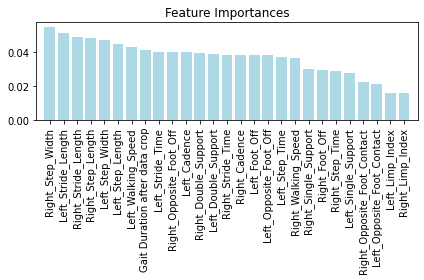

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df.columns[0:27]

forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(x_train_std, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(x_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(x_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

In [ ]:
features = feat_labels[indices[:27]]
# print(features[1])
# print(x_train[features])
knn.fit((x_train[features]), y_train)
print('Training accuracy:', knn.score((x_train[features]), y_train))
print('Test accuracy:', knn.score((x_val[features]), y_val))

Training accuracy: 1.0
Test accuracy: 0.25


**PCA & LDA**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train_std)
X_test_pca = pca.transform(x_test_std)

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(x_train_std, y_train)
X_test_lda = lda.transform(x_test_std)

In [ ]:
bayes = GaussianNB(var_smoothing = 0.05)

bayes.fit(X_train_pca, y_train)
print('Test accuracy:', bayes.score(X_test_pca, y_val))

bayes.fit(X_train_lda, y_train)
print('Test accuracy:', bayes.score(X_test_lda, y_val))

Test accuracy: 0.36363636363636365
Test accuracy: 0.3181818181818182


In [ ]:
lr = LogisticRegression(C=1, random_state=0)

lr.fit(X_train_pca, y_train)
print('Test accuracy:', lr.score(X_test_pca, y_val))

lr.fit(X_train_lda, y_train)
print('Test accuracy:', lr.score(X_test_lda, y_val))

Test accuracy: 0.4318181818181818
Test accuracy: 0.29545454545454547


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, p=1, metric='minkowski')

knn.fit(X_train_pca, y_train)
print('Test accuracy:', knn.score(X_test_pca, y_val))

knn.fit(X_train_lda, y_train)
print('Test accuracy:', knn.score(X_test_lda, y_val))

Test accuracy: 0.29545454545454547
Test accuracy: 0.36363636363636365


In [ ]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=1.0)

svm.fit(X_train_pca, y_train)
print('Test accuracy:', knn.score(X_test_pca, y_val))

svm.fit(X_train_lda, y_train)
print('Test accuracy:', knn.score(X_test_lda, y_val))

Test accuracy: 0.022727272727272728
Test accuracy: 0.36363636363636365


In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

tree.fit(X_train_pca, y_train)
print('Test accuracy:', tree.score(X_test_pca, y_val))

tree.fit(X_train_lda, y_train)
print('Test accuracy:', tree.score(X_test_lda, y_val))

Test accuracy: 0.1590909090909091
Test accuracy: 0.11363636363636363


In [ ]:
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10, 
                                random_state=1,
                                n_jobs=2)

forest.fit(X_train_pca, y_train)
print('Test accuracy:', forest.score(X_test_pca, y_val))

forest.fit(X_train_lda, y_train)
print('Test accuracy:', forest.score(X_test_lda, y_val))

Test accuracy: 0.3181818181818182
Test accuracy: 0.36363636363636365


In [ ]:
MLP = MLPClassifier(learning_rate_init=0.001, activation= "logistic")

MLP.fit(X_train_pca, y_train)
print('Test accuracy:', MLP.score(X_test_pca, y_val))

MLP.fit(X_train_lda, y_train)
print('Test accuracy:', MLP.score(X_test_lda, y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Test accuracy: 0.3181818181818182
Test accuracy: 0.29545454545454547


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# **Deep Learning**

**DEEP LEARNING CNN**

In [ ]:
print("The unique labels that we have in the training labels: ",len(set(y_train)))
print("The unique labels that we have in the test labels: ",len(set(y_val)))

The unique labels that we have in the training labels:  44
The unique labels that we have in the test labels:  44


In [ ]:
print(x_train_std.shape)
print(x_test_std.shape)

(176, 27)
(44, 27)


In [ ]:
# Define baseline model
def model_baseline():
  model = Sequential()
  model.add(Dense(10, input_dim=27, activation='linear'))
  model.add(Dense(5, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
# Checkpoint definition
from keras.callbacks import ModelCheckpoint

filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
# Fitting model to data
model = model_baseline()
history = model.fit(x_train_std, y_train, validation_split=0.2, epochs=50, batch_size=16, callbacks=callbacks_list, verbose=2)

In [ ]:
model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=27, output_dim=1))

# Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(128))

# Add a Dense layer with 10 units.
model.add(layers.Dense(1))

opt = "Adam"
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 1)           27        
                                                                 
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_230 (Dense)           (None, 1)                 129       
                                                                 
Total params: 66,716
Trainable params: 66,716
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
# model = Sequential()
# model.add(Dense(10, input_dim=27, activation='softmax'))
# model.add(layers.Dense(256))
# model.add(layers.Dense(256))
# model.add(Dense(128, activation='sigmoid'))
# model.add(Dense(64, activation='sigmoid'))
# model.add(Dense(32, activation='sigmoid'))
# model.add(layers.Dropout(0.5))
# model.add(Dense(1, activation='softmax'))

model = Sequential()
model.add(Dense(1, input_dim=2, activation='softmax'))
# model.add(layers.Dense(128))
# model.add(layers.Dense(64))
# model.add(layers.Dense(32))
model.add(Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(Dense(1, activation='softmax'))

  
# class_weights = compute_class_weight('balanced',
#                                       np.unique(y_train),
#                                       y_train)
# classWeight = (compute_class_weight('balanced', np.unique(y_train), y_train)).any()
# classWeight = dict(enumerate(classWeight))
# print(class_weights[2])

opt = SGD(lr=0.000001, momentum=0.9)
# opt = "Adam"
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
from sklearn.utils import class_weight
class_weights = dict(zip(np.array([i for i in range(44)]), class_weight.compute_class_weight('balanced', np.unique(y_train), 
                y_train)))

In [ ]:
#model.fit(x_train, y_train, epochs=10)
model.summary()
model.fit(X_train_lda, y_train, validation_data=(X_test_lda, y_val), epochs=20)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
 dense_10 (Dense)            (None, 128)               256       
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 388
Trainable params: 388
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - 1s 45ms/step - loss: 0.0000e+00 - accuracy: 0.0227 - val_loss: 0.0000e+00 - val_accuracy: 0.0227
Epoch 2/20
6/6 [=========================

In [ ]:
model.evaluate(x_test_std, y_val)

2/2 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0227


[0.0, 0.022727273404598236]